In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/crime-data-versions/v10crimedata.csv')

In [4]:
data.head()

,Incident UID,Agency,Incident Date,CIBRS Unique Offense ID,CIBRS Offense Code,CIBRS Offense Description,Victim UID,Victim Category,Victim Age,Overall Race,City,Zip Code,CIBRS Status,Domestic Violence Incident,HHSA Region
0,661987,SAN DIEGO,2/18/21 17:40,661987-13A-679864,13A,Aggravated Assault,679864,I,22,HISPANIC,SAN DIEGO,92037,ProcessingComplete - Valid,True,NORTH CENTRAL
1,793674,SAN DIEGO,3/16/21 5:30,793674-11A-818279,11A,Forcible Rape,818279,I,41,WHITE,SAN DIEGO,92110,ProcessingComplete - Valid,False,NORTH CENTRAL
2,859375,NATIONAL CITY,3/22/21 14:25,859375-11A-887268,11A,Forcible Rape,887268,I,22,HISPANIC,NATIONAL CITY,91950,ProcessingComplete - Valid,False,SOUTH
3,658884,SAN DIEGO,3/24/21 12:00,658884-13B-676587,13B,Simple Assault,676587,I,45,HISPANIC,SAN DIEGO,92101,ProcessingComplete - Valid,True,CENTRAL
4,721771,CARLSBAD,5/4/21 18:54,721771-13B-743217,13B,Simple Assault,743217,I,28,HISPANIC,CARLSBAD,92011,ProcessingComplete - Valid,False,NORTH COASTAL


## basic info about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54678 entries, 0 to 54677
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Incident UID                54678 non-null  int64 
 1   Agency                      54678 non-null  object
 2   Incident Date               54678 non-null  object
 3   CIBRS Unique Offense ID     54678 non-null  object
 4   CIBRS Offense Code          54678 non-null  object
 5   CIBRS Offense Description   54678 non-null  object
 6   Victim UID                  54678 non-null  int64 
 7   Victim Category             54678 non-null  object
 8   Victim Age                  54678 non-null  int64 
 9   Overall Race                54678 non-null  object
 10  City                        54678 non-null  object
 11  Zip Code                    54678 non-null  int64 
 12  CIBRS Status                54678 non-null  object
 13  Domestic Violence Incident  54678 non-null  bo

## analyzing the different crime types

In [8]:
# counts of different types of crimes 

data['CIBRS Offense Description'].value_counts()

CIBRS Offense Description
Simple Assault          33439
Aggravated Assault      12156
Intimidation             3621
Kidnapping/Abduction     1831
Forcible Rape            1676
Forcible Fondling        1327
Other                     628
Name: count, dtype: int64

## analyze the victim age data

<Axes: >

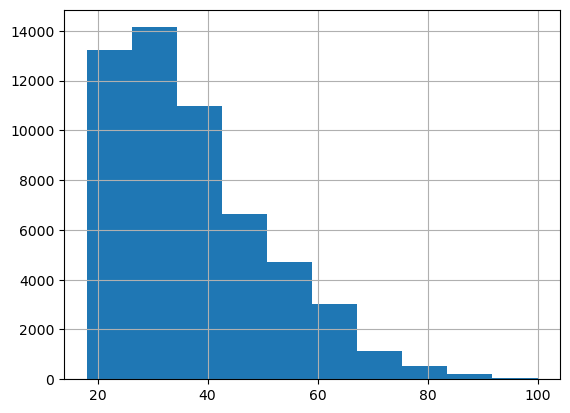

In [10]:
data['Victim Age'].hist()

## analyze the incident date/time data

In [12]:
# convert to datetime - why didnt this stay from v9?

data['Incident Date'] = pd.to_datetime(data['Incident Date'], format='%m/%d/%y %H:%M')

In [13]:
data.dtypes

Incident UID                           int64
Agency                                object
Incident Date                 datetime64[ns]
CIBRS Unique Offense ID               object
CIBRS Offense Code                    object
CIBRS Offense Description             object
Victim UID                             int64
Victim Category                       object
Victim Age                             int64
Overall Race                          object
City                                  object
Zip Code                               int64
CIBRS Status                          object
Domestic Violence Incident              bool
HHSA Region                           object
dtype: object

In [14]:
data_time = data

In [15]:
data_time['Hour'] = data_time['Incident Date'].dt.hour

In [16]:
data_time

,Incident UID,Agency,Incident Date,CIBRS Unique Offense ID,CIBRS Offense Code,CIBRS Offense Description,Victim UID,Victim Category,Victim Age,Overall Race,City,Zip Code,CIBRS Status,Domestic Violence Incident,HHSA Region,Hour
0,661987,SAN DIEGO,2021-02-18 17:40:00,661987-13A-679864,13A,Aggravated Assault,679864,I,22,HISPANIC,SAN DIEGO,92037,ProcessingComplete - Valid,True,NORTH CENTRAL,17
1,793674,SAN DIEGO,2021-03-16 05:30:00,793674-11A-818279,11A,Forcible Rape,818279,I,41,WHITE,SAN DIEGO,92110,ProcessingComplete - Valid,False,NORTH CENTRAL,5
2,859375,NATIONAL CITY,2021-03-22 14:25:00,859375-11A-887268,11A,Forcible Rape,887268,I,22,HISPANIC,NATIONAL CITY,91950,ProcessingComplete - Valid,False,SOUTH,14
3,658884,SAN DIEGO,2021-03-24 12:00:00,658884-13B-676587,13B,Simple Assault,676587,I,45,HISPANIC,SAN DIEGO,92101,ProcessingComplete - Valid,True,CENTRAL,12
4,721771,CARLSBAD,2021-05-04 18:54:00,721771-13B-743217,13B,Simple Assault,743217,I,28,HISPANIC,CARLSBAD,92011,ProcessingComplete - Valid,False,NORTH COASTAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54673,2335743,SAN DIEGO,2024-09-29 20:00:00,2335743-13A-2048525,13A,Aggravated Assault,2048525,I,57,HISPANIC,SAN DIEGO,92101,ProcessingComplete - Valid,True,CENTRAL,20
54674,2344705,SHERIFF,2024-09-27 19:30:00,2344705-13B-2055667,13B,Simple Assault,2055667,I,47,HISPANIC,SAN MARCOS,92069,ProcessingComplete - Invalid,False,NORTH INLAND,19
54675,2332374,OCEANSIDE,2024-09-28 19:20:00,2332374-13B-2045587,13B,Simple Assault,2045587,I,36,HISPANIC,OCEANSIDE,92054,ProcessingComplete - Valid,True,NORTH COASTAL,19
54676,2332703,SAN DIEGO,2024-09-30 00:56:00,2332703-13B-2045943,13B,Simple Assault,2045943,I,59,HISPANIC,SAN DIEGO,92113,ProcessingComplete - Valid,True,CENTRAL,0


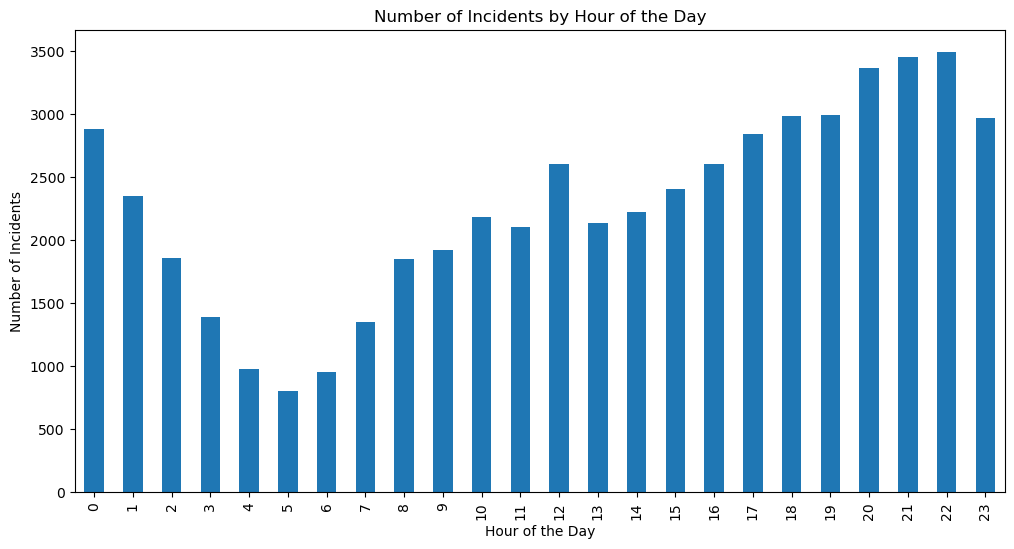

In [17]:
data_time['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Hour of the Day')
plt.savefig('incidents_by_hour.png')
plt.show()

In [18]:
data_time['Month'] = data_time['Incident Date'].dt.month

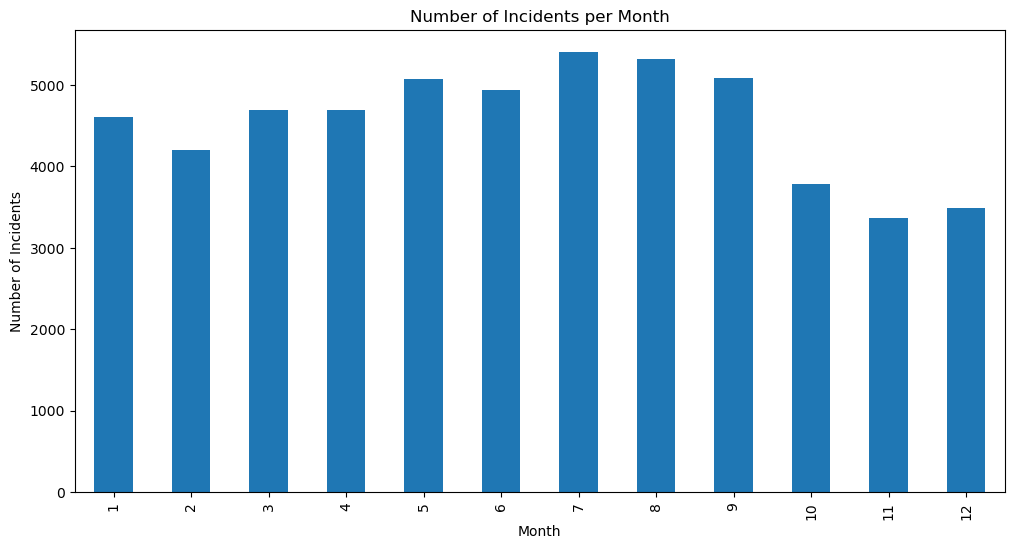

In [19]:
data_time['Month'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Month')
plt.savefig('incidents_by_month.png')
plt.show()

In [20]:
data_time['DayOfWeek'] = data_time['Incident Date'].dt.dayofweek

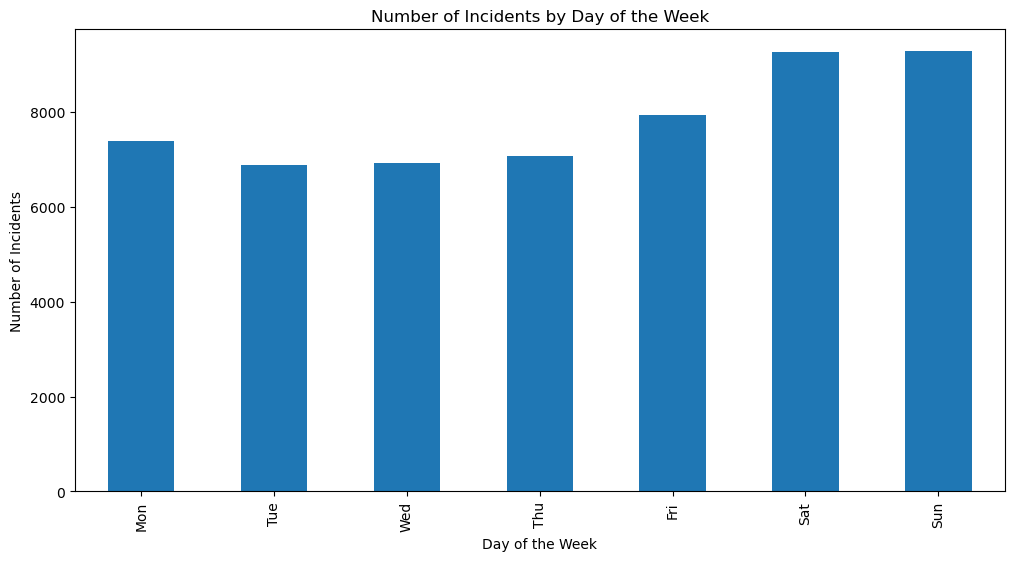

In [21]:
data_time['DayOfWeek'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.savefig('incidents_by_day.png')
plt.show()

In [22]:
data_time['Year'] = data_time['Incident Date'].dt.year

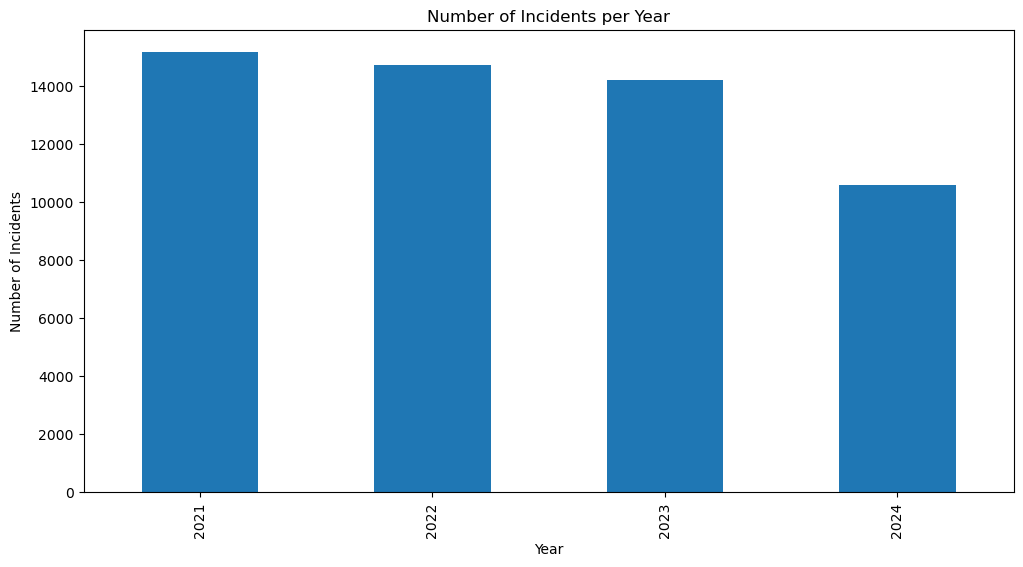

In [23]:
data_time['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Year')
plt.savefig('incidents_by_year.png')
plt.show()

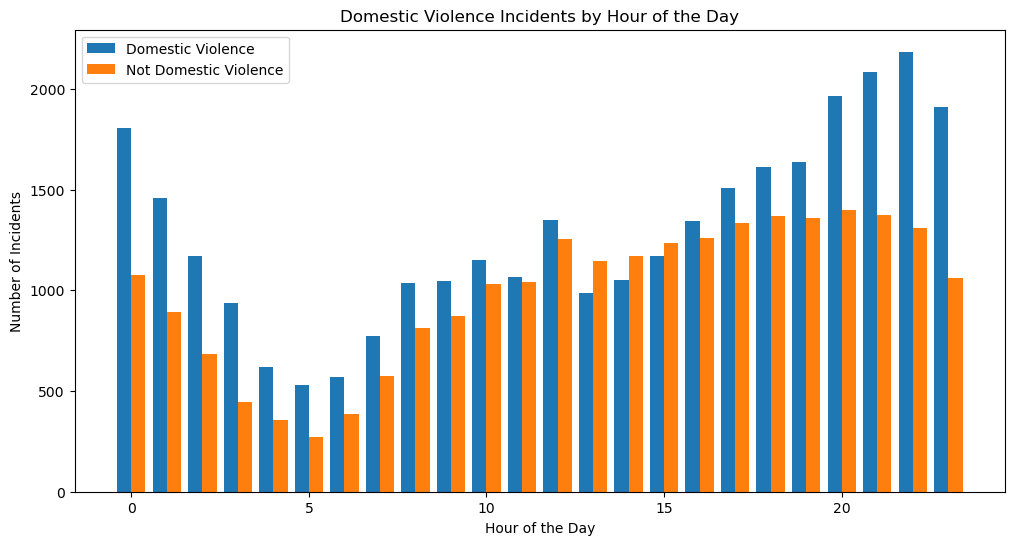

In [24]:
# Create a pivot table for Domestic Violence incidents
domestic_violence = data_time[data_time['Domestic Violence Incident'] == True].pivot_table(index='Hour', values='Incident UID', aggfunc='count')
not_domestic_violence = data_time[data_time['Domestic Violence Incident'] == False].pivot_table(index='Hour', values='Incident UID', aggfunc='count')

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(domestic_violence.index - 0.2, domestic_violence['Incident UID'], width=0.4, label='Domestic Violence')
plt.bar(not_domestic_violence.index + 0.2, not_domestic_violence['Incident UID'], width=0.4, label='Not Domestic Violence')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.title('Domestic Violence Incidents by Hour of the Day')
plt.legend()
plt.savefig('incidents_by_hour_DV.png')
plt.show()

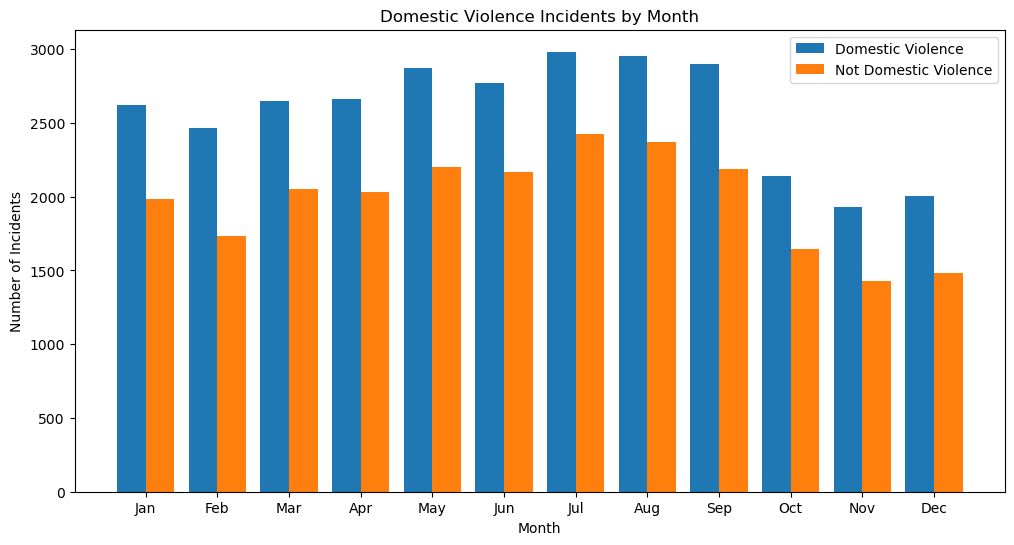

In [25]:
# Create a pivot table for Domestic Violence incidents
domestic_violence = data_time[data_time['Domestic Violence Incident'] == True].pivot_table(index='Month', values='Incident UID', aggfunc='count')
not_domestic_violence = data_time[data_time['Domestic Violence Incident'] == False].pivot_table(index='Month', values='Incident UID', aggfunc='count')

plt.figure(figsize=(12, 6))
plt.bar(domestic_violence.index - 0.2, domestic_violence['Incident UID'], width=0.4, label='Domestic Violence')
plt.bar(not_domestic_violence.index + 0.2, not_domestic_violence['Incident UID'], width=0.4, label='Not Domestic Violence')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Domestic Violence Incidents by Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.savefig('incidents_by_month_DV.png')
plt.show()

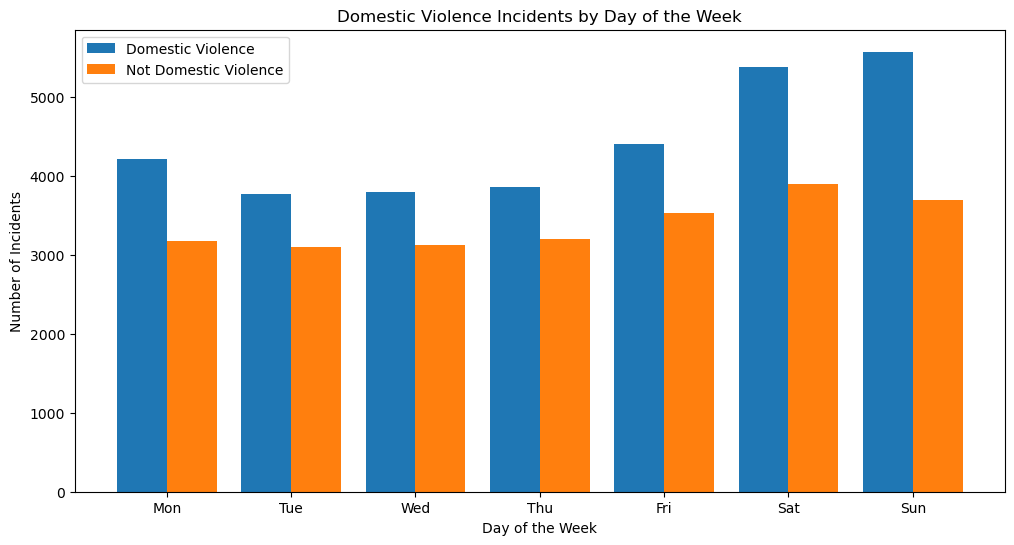

In [26]:
# Create a pivot table for Domestic Violence incidents
domestic_violence = data_time[data_time['Domestic Violence Incident'] == True].pivot_table(index='DayOfWeek', values='Incident UID', aggfunc='count')
not_domestic_violence = data_time[data_time['Domestic Violence Incident'] == False].pivot_table(index='DayOfWeek', values='Incident UID', aggfunc='count')

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(domestic_violence.index - 0.2, domestic_violence['Incident UID'], width=0.4, label='Domestic Violence')
plt.bar(not_domestic_violence.index + 0.2, not_domestic_violence['Incident UID'], width=0.4, label='Not Domestic Violence')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('Domestic Violence Incidents by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.savefig('incidents_by_day_DV.png')
plt.show()

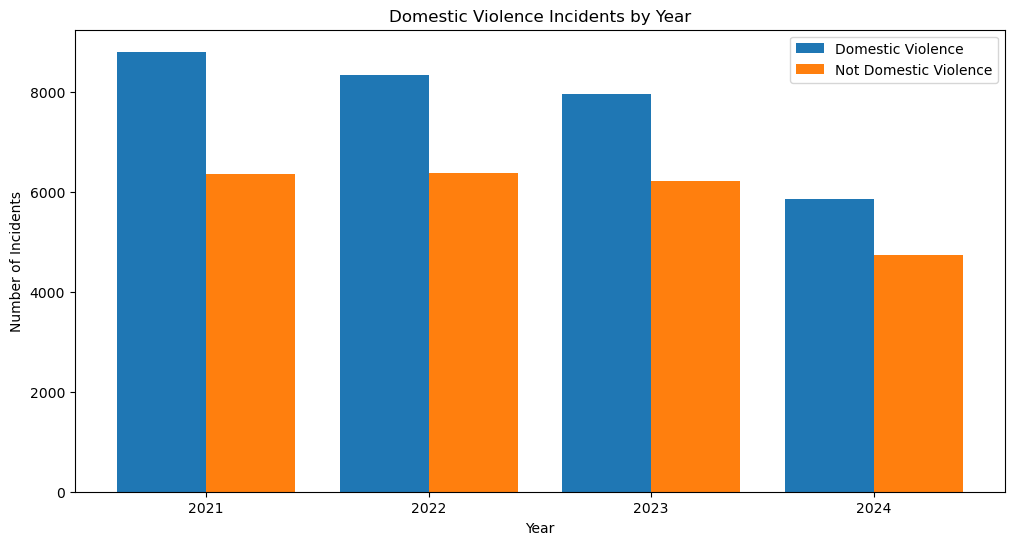

In [27]:
# Create a pivot table for Domestic Violence incidents
domestic_violence = data_time[data_time['Domestic Violence Incident'] == True].pivot_table(index='Year', values='Incident UID', aggfunc='count')
not_domestic_violence = data_time[data_time['Domestic Violence Incident'] == False].pivot_table(index='Year', values='Incident UID', aggfunc='count')

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(domestic_violence.index - 0.2, domestic_violence['Incident UID'], width=0.4, label='Domestic Violence')
plt.bar(not_domestic_violence.index + 0.2, not_domestic_violence['Incident UID'], width=0.4, label='Not Domestic Violence')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Domestic Violence Incidents by Year')
plt.xticks(ticks=[2021, 2022, 2023, 2024], labels=['2021', '2022', '2023', '2024'])
plt.legend()
plt.savefig('incidents_by_year_DV.png')
plt.show()